<h1>Neste Trabalho Será Demonstrado Uma Rede PercepTron Simples</h1>


<h4>Caso Seja a primeira vez usando o programa utilize os comandos abaixo, senão pule o bloco</h4>


In [ ]:
!python -m pip install --upgrade pip
!python -m pip install -r requirements.txt

<h3>Importação das Bibliotecas Utilizadas</h1>


In [1]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

<h3>Implementação da Rede Perceptron</h3>


In [2]:
class Perceptron:
    def __init__(self, learn_rate=0.01, iterations=10):
        self.learn_rate = learn_rate
        self.iterations = iterations

    def fit(self, inputs, outputs):
        self.weights_ = np.zeros(1 + inputs.shape[1])
        self.errors_ = []

        for _ in range(self.iterations):
            erros = 0
            for xi, target in zip(inputs, outputs):
                update = self.learn_rate * (target - self.predict(xi))
                self.weights_[1:] += xi * update
                self.weights_[0] += update
                erros += int(update != 0.0)
            self.errors_.append(erros)

    def net_input(self, inputs):
        return np.dot(
                    inputs, self.weights_[1:]) + self.weights_[0]

    def predict(self, inputs):
        return np.where(
                    self.net_input(inputs) >= 0.0, 1, -1)

    def activation(self, inputs):
        return self.net_input(inputs)

In [3]:
def plot_decision_regions(X, Y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(
                        colors[:len(np.unique(Y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange (x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)

    for idx, cl in enumerate(np.unique(Y)):
        plt.scatter(x=X[Y == cl, 0], y=X[Y == cl, 1],
        alpha=0.8, c=cmap(idx),
        marker=markers[idx], label=cl)

<h3>Lendo o DataSet</h3>


In [4]:
try:
    df = pd.read_csv(
        'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
        names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species'])
except:
    df = pd.read_csv(
        'iris.data',
        names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species'])

_cat = list(df['Species'].unique())
cat = dict()
for index in range(len(_cat)):
    if 'setosa' in  _cat[index]:
        cat[0] = _cat[index]
    else:
        cat[1] = 'Iris-n-Setosa'

inputs = df.iloc[0:,[0,2]].values

outputs = np.zeros((len(df), 1))

df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<h3>Reorganizando os Dados que Serão Utilizados</h3>


In [5]:
for i, row in df.iterrows():
    outputs[i:] = -1 if row.Species == 'Iris-setosa' else 1
    inputs[i:] = np.array([row.SepalLengthCm,
                           row.PetalLengthCm])

<h3>Criando Um Novo DataFrame Com Os Dados Reorganizados</h3>


In [7]:
df_full = pd.DataFrame(inputs, columns=['SepalLengthCm', 'PetalLengthCm'])
df_full['Species'] = outputs

cat_2 = np.array(list(df_full['Species'].unique()))

train_data = pd.DataFrame()

for sp in cat_2:
    temp = pd.DataFrame()
    temp = pd.concat([temp, df_full[df_full[
        'Species'] == sp]]).sample(frac=0.8).reset_index(drop=True)
    train_data = pd.concat([train_data, temp])

new_outputs = np.array(train_data.iloc[:, -1])
new_inputs = np.array(train_data.drop(columns=train_data.columns[-1]))

df_full.head()


,SepalLengthCm,PetalLengthCm,Species
0,5.1,1.4,-1.0
1,4.9,1.4,-1.0
2,4.7,1.3,-1.0
3,4.6,1.5,-1.0
4,5.0,1.4,-1.0


<h3>Plotando DataSet Baseado Nas Sepal E Petal Length De Acordo Com As Espécies</h3>


-1.0
1.0


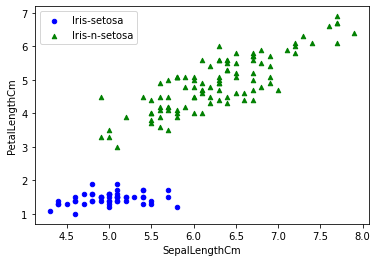

In [8]:
plot_area = None
colors = ['blue', 'green', 'red']
markers = ['o', '^', 'v']
species = ['Iris-setosa', 'Iris-n-setosa']
for var in cat_2:
    print(var)
    plot_area = df_full[df_full['Species'] == var].plot.scatter(x='SepalLengthCm', y='PetalLengthCm',
                                                      ax=plot_area, color=colors.pop(0),
                                                      marker=markers.pop(0), label=species.pop(0))

In [9]:
p = Perceptron(learn_rate=0.1, iterations=10)
p.fit(new_inputs, new_outputs)

In [10]:
out_string = []
for i in new_outputs:
    if i == -1:
        out_string.append('Iris-setosa')
    else:
        out_string.append('Iris-n-setosa')
out_string = np.array(out_string)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


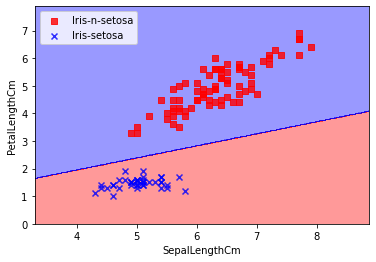

In [11]:
plot_decision_regions(new_inputs, out_string, p)
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.legend(loc='upper left')
plt.show()

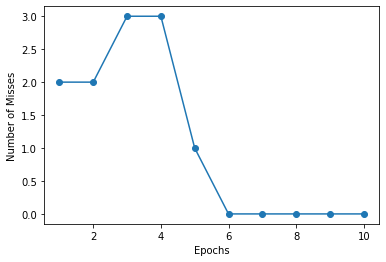

In [12]:
plt.plot(range(1, len(p.errors_)+1), p.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of Misses')
plt.show()